In [26]:
import numpy as np
import pandas as pd
import xlrd

import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, ifft, rfft

def fft_from_data_frame(data_frame):
    fs= 114e3
    signal_set = []
    for row in data_frame.values:
        fft_data = fft(row, n=row.size)/row.size
        freq = fftfreq(row.size, d=1/fs)
        cut_high_signal = np.abs(fft_data).copy()
        cut_high_signal[(freq > 50000)] = 0
        cut_high_signal[(freq < 30000)] = 0
        signal_without_0 = list(filter(lambda a: a != 0, cut_high_signal))
        signal_set.append(np.abs(signal_without_0))
    return signal_set

In [27]:
import glob

def get_fft_set(file_names):
    fft_set = []
    for front in file_names:
        data = pd.read_csv(front)
        fft_data = fft_from_data_frame(data)
        fft_set = fft_data + fft_set
    return fft_set

car_front_1 = glob.glob('./Documents/data_set/Result/67_Ford_Black_front/*_overall.csv')
car_front_2 = glob.glob('./Documents/data_set/Result/99_Fiesta_Purple_front/*_overall.csv')
car_side_1 = glob.glob('./Documents/data_set/Result/99_Fiesta_Purple_side/*_overall.csv')
car_side_2 = glob.glob('./Documents/data_set/Result/129_Skoda_Grey_side/*_overall.csv')
car_back_1 = glob.glob('./Documents/data_set/Result/26_Ford_Black_back/*_overall.csv')
car_back_2 = glob.glob('./Documents/data_set/Result/66_Ford_Purple_back/*_overall.csv')
motorbike_1 = glob.glob('./Documents/data_set/Result/92_CBF_Honda_side1/*_overall.csv')
motorbike_2 = glob.glob('./Documents/data_set/Result/92_CBF_Honda_side2/*_overall.csv')
cycle_1 = glob.glob('./Documents/data_set/Result/Cycle_side/*_overall.csv')
human_A = glob.glob('./Documents/data_set/Result/Human_A/*_overall.csv')
human_B = glob.glob('./Documents/data_set/Result/Human_B/*_overall.csv')
human_C = glob.glob('./Documents/data_set/Result/Human_C/*_overall.csv')
human_D = glob.glob('./Documents/data_set/Result/Human_D/*_overall.csv')
human_E = glob.glob('./Documents/data_set/Result/Human_E/*_overall.csv')
pillar_1 = glob.glob('./Documents/data_set/Result/Pillar_1/*_overall.csv')
pillar_2 = glob.glob('./Documents/data_set/Result/Pillar_2/*_overall.csv')
pillar_3 = glob.glob('./Documents/data_set/Result/Pillar_3/*_overall.csv')
stopper_1 = glob.glob('./Documents/data_set/Result/Stopper_1/*_overall.csv')
stopper_2 = glob.glob('./Documents/data_set/Result/Stopper_2/*_overall.csv')
# ventilator_1 = glob.glob('./Documents/data_set/Result/Ventilator_1/*_overall.csv')
wall_1 = glob.glob('./Documents/data_set/Result/Wall_1/*_overall.csv')
wall_2 = glob.glob('./Documents/data_set/Result/Wall_2/*_overall.csv')
wall_3 = glob.glob('./Documents/data_set/Result/Wall_3/*_overall.csv')

car_front_1_fft = get_fft_set(car_front_1)
car_front_2_fft = get_fft_set(car_front_2)
car_side_1_fft = get_fft_set(car_side_1)
car_side_2_fft = get_fft_set(car_side_2)
car_back_1_fft = get_fft_set(car_back_1)
car_back_2_fft = get_fft_set(car_back_2)
motorbike_1_fft = get_fft_set(motorbike_1)
motorbike_2_fft = get_fft_set(motorbike_2)
cycle_1_fft = get_fft_set(cycle_1)
human_A_fft = get_fft_set(human_A)
human_B_fft = get_fft_set(human_B)
human_C_fft = get_fft_set(human_C)
human_D_fft = get_fft_set(human_D)
human_E_fft = get_fft_set(human_E)
pillar_1_fft = get_fft_set(pillar_1)
pillar_2_fft = get_fft_set(pillar_2)
pillar_3_fft = get_fft_set(pillar_3)
stopper_1_fft = get_fft_set(stopper_1)
stopper_2_fft = get_fft_set(stopper_2)
# ventilator_1_fft = get_fft_set(ventilator_1)
wall_1_fft = get_fft_set(wall_1)
wall_2_fft = get_fft_set(wall_2)
wall_3_fft = get_fft_set(wall_3)

In [28]:
car = car_front_1_fft + car_front_2_fft + car_side_1_fft + car_side_2_fft + car_back_1_fft + car_back_2_fft
motorbike = motorbike_1_fft + motorbike_2_fft
cycle = cycle_1_fft
human = human_A_fft + human_B_fft + human_C_fft + human_D_fft + human_E_fft
pillar = pillar_1_fft + pillar_2_fft + pillar_2_fft
stopper = stopper_1_fft + stopper_2_fft
# ventilator = ventilator_1_fft
wall = wall_1_fft + wall_2_fft + wall_3_fft
 
X = car + motorbike + cycle + human + pillar + stopper + wall
y = len(car)*['Car'] + len(motorbike)*['Motorbike'] + len(cycle)*['Cycle'] + len(human)*['Human'] + len(pillar)*['Pillar'] + len(stopper)*['Stopper'] + len(wall)*['Wall']

print(len(car))
print(len(motorbike))
print(len(cycle))
print(len(human))
print(len(pillar))
print(len(stopper))
# print(len(ventilator))
print(len(wall))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

11465
2129
302
1690
9407
2690
5032


In [29]:
print('X train data : ', np.array(X_train).shape)
print('X test data : ', np.array(X_test).shape)
print('y train data : ', np.array(y_train).shape)
print('y test data : ', np.array(y_test).shape)

X train data :  (19629, 90)
X test data :  (13086, 90)
y train data :  (19629,)
y test data :  (13086,)


In [33]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt  

def plot_confusionMatrix(result, y_test, labels = ['CAR', 'MOTORBIKE', 'CYCLE', 'HUMAN', 'PILLAR', 'STOPPER', 'WALL']):
    cm = confusion_matrix(result, y_test)
    print(cm)
    recall_set = []
    cm_overall = []
    for index, value in enumerate(labels):
#         print(index, labels[index])
        precision = round(precision_score(y_test, result, average='micro',labels=labels[index]),2)
        recall = round(recall_score(y_test, result, average='micro',labels=labels[index]),2)
        recall_set.append(recall)
        cm_overall.append(np.append(cm[index], precision))
    score = accuracy_score(result, y_test)
    cm_overall.append(np.append(recall_set, score))
#     print(recall_set, cm_overall) 
    sum = np.sum(cm, axis=1)
    cm = cm_overall   
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cm, annot=True, ax = ax,linewidths=.5,fmt='g',cmap="Greens"); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    counter = 0
    for i in range(0,7):
        for j in range(0,8):
            percentage = cm[i][j]/sum[i]
            t = ax.texts[counter]
            if j == 7 :
                t.set_text(str(cm[i][j]))
            else:
                t.set_text(str(cm[i][j]) + '\n' + str(round(percentage*100,2)) + " %")
            counter = counter + 1
    ax.xaxis.set_ticklabels(labels); 
    ax.yaxis.set_ticklabels(labels);
    
#     from sklearn.metrics import classification_report
#     print(classification_report(y_test, result, ['CAR', 'MOTORBIKE', 'CYCLE', 'HUMAN', 'PILLAR', 'STOPPER', 'WALL']))

In [31]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

normalized_X_train = preprocessing.normalize(X_train)
normalized_X_test = preprocessing.normalize(X_test)

[[4515   26  265  218   32   75   50]
 [   0   40    0    0    0    0    0]
 [  53   35  313    3    0   17    2]
 [   0    3    4  525    0    0    0]
 [  27    3   13   67 3616   24   89]
 [  12   17  112    4   49  974   11]
 [   3    3    4   34    9    3 1836]]
0.903178969891487
[[4515   26  265  218   32   75   50]
 [   0   40    0    0    0    0    0]
 [  53   35  313    3    0   17    2]
 [   0    3    4  525    0    0    0]
 [  27    3   13   67 3616   24   89]
 [  12   17  112    4   49  974   11]
 [   3    3    4   34    9    3 1836]]


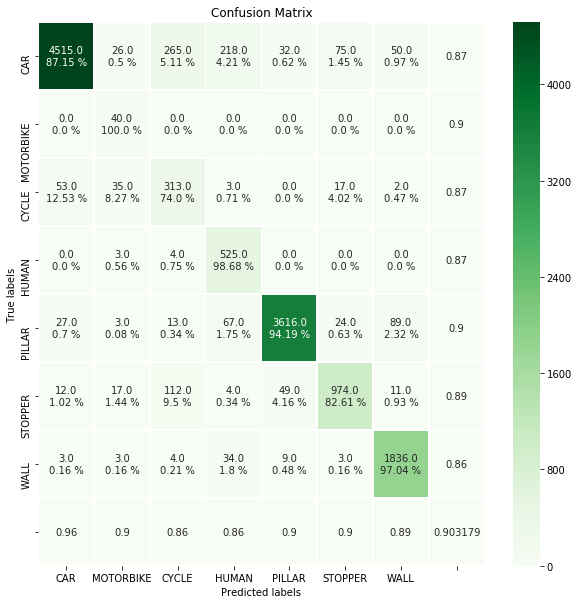

In [34]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=2, random_state=0, n_estimators=50)
clf.fit(normalized_X_train, y_train)
result = clf.predict(normalized_X_test)

print(confusion_matrix(result, y_test))
print(accuracy_score(result, y_test))
plot_confusionMatrix(result, y_test)

[[4558    4  167   51    1    9    2]
 [   0  104    5    2    0    1    0]
 [  47    3  306    6    0    4    0]
 [   0    0   15  691    0    0    0]
 [   3    5  127   60 3677   25   11]
 [   1    8   62    6    0 1046    0]
 [   1    3   29   35   28    8 1975]]
0.9442916093535075
[[4558    4  167   51    1    9    2]
 [   0  104    5    2    0    1    0]
 [  47    3  306    6    0    4    0]
 [   0    0   15  691    0    0    0]
 [   3    5  127   60 3677   25   11]
 [   1    8   62    6    0 1046    0]
 [   1    3   29   35   28    8 1975]]


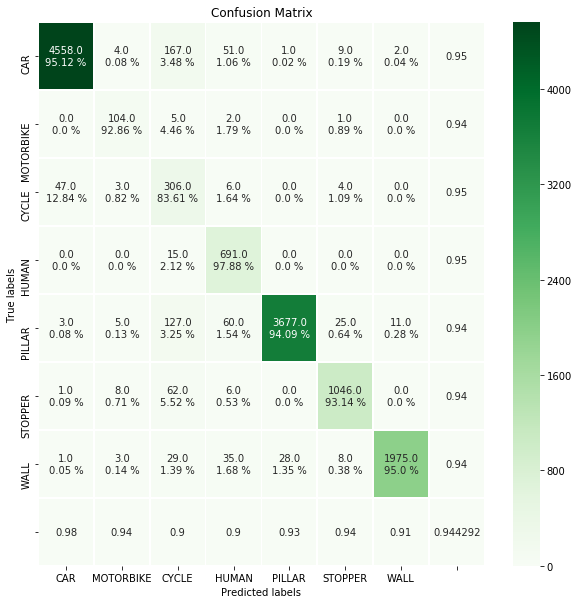

In [35]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(normalized_X_train,y_train)
# print('\nThe number of neighbors used to predict the target : ',clf.n_neighbors)
result = clf.predict(normalized_X_test)

print(confusion_matrix(result, y_test)) 
print(accuracy_score(result, y_test))
plot_confusionMatrix(result, y_test)

[[3493   39  272  622  857  182  293]
 [   0    6    0    0    0    0    0]
 [   0   50  243    3    1   31    0]
 [   5    1    0   11    0    0    0]
 [ 923    3   39  140 2444   49  820]
 [  76   27  156    7   87  823   12]
 [ 113    1    1   68  317    8  863]]
0.602399510927709
[[3493   39  272  622  857  182  293]
 [   0    6    0    0    0    0    0]
 [   0   50  243    3    1   31    0]
 [   5    1    0   11    0    0    0]
 [ 923    3   39  140 2444   49  820]
 [  76   27  156    7   87  823   12]
 [ 113    1    1   68  317    8  863]]


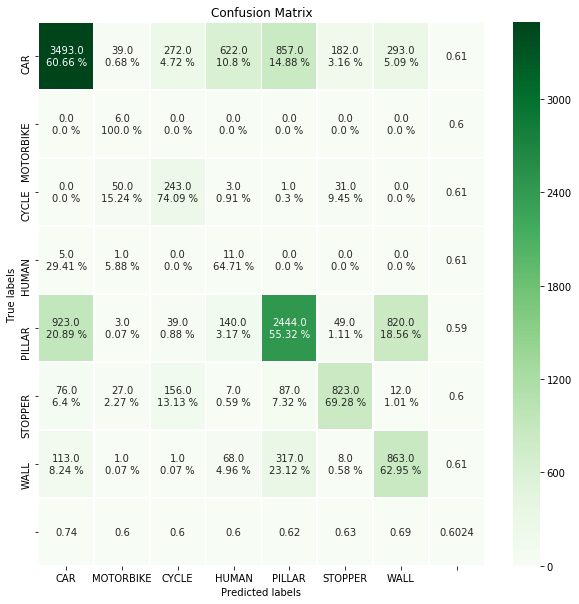

In [36]:
from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(normalized_X_train,y_train)
result = clf.predict(normalized_X_test)

print(confusion_matrix(result, y_test))
print(accuracy_score(result,y_test))
plot_confusionMatrix(result, y_test)

[[1727   21  106   88  400   65   93]
 [ 169   76   28   61  107   19   53]
 [ 222   12  376    4   42   90    0]
 [ 460    7   27  484  406    0   94]
 [ 380    1   19    7  771    8  134]
 [ 297    8  120    4  345  910   11]
 [1355    2   35  203 1635    1 1603]]
0.45445514290081
[[1727   21  106   88  400   65   93]
 [ 169   76   28   61  107   19   53]
 [ 222   12  376    4   42   90    0]
 [ 460    7   27  484  406    0   94]
 [ 380    1   19    7  771    8  134]
 [ 297    8  120    4  345  910   11]
 [1355    2   35  203 1635    1 1603]]


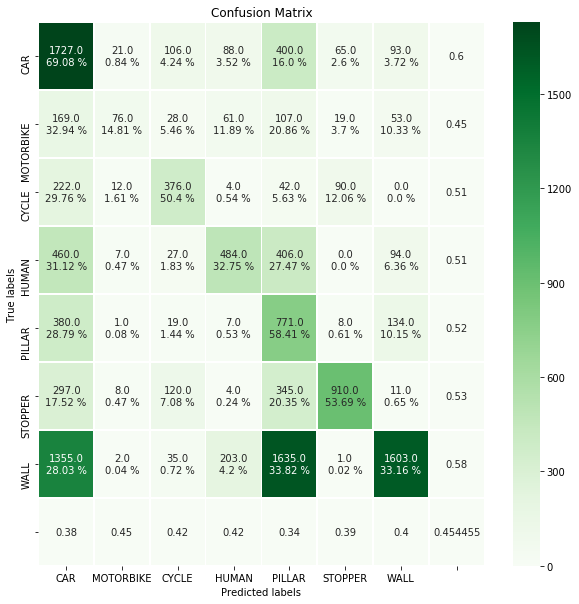

In [38]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(normalized_X_train, y_train)
result = gnb.predict(normalized_X_test)

# from sklearn import metrics
print(confusion_matrix(result, y_test))
print(accuracy_score(result, y_test))
plot_confusionMatrix(result, y_test)

In [37]:
len(human_A_fft[0])

90

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

normalized_X_train = preprocessing.normalize(X_train)
normalized_X_test = preprocessing.normalize(X_test)

from sklearn.model_selection import cross_val_score

for i in range(13,50):
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(i), random_state=5)
    scores = cross_val_score(clf, normalized_X_train, y_train, cv=4, scoring="accuracy")
    print("hidden layer", i, "score average", scores.mean())

hidden layer 13 score average 0.7124553489198222
hidden layer 14 score average 0.7380315369839223
hidden layer 15 score average 0.7581633357892797
hidden layer 16 score average 0.5889664960661001
hidden layer 17 score average 0.7253925676920243
hidden layer 18 score average 0.7219354941276566
hidden layer 19 score average 0.7254443454025559
hidden layer 20 score average 0.7603889824487541
hidden layer 21 score average 0.7596314764623846
hidden layer 22 score average 0.743238335350718
hidden layer 23 score average 0.7871944594286416
hidden layer 24 score average 0.7671219212956872
hidden layer 25 score average 0.7752547496250295
hidden layer 26 score average 0.7683479209974651
hidden layer 27 score average 0.7650152893631204
hidden layer 28 score average 0.7241637447482216
hidden layer 29 score average 0.801006883228517
hidden layer 30 score average 0.7592196394582884
hidden layer 31 score average 0.7452229100334185
hidden layer 32 score average 0.7455830515573332
hidden layer 33 score 

[[3998   10  115  151  386  112   35]
 [   2   96   13   16    0    4    1]
 [  29   64  287   17    2   57    0]
 [  22   12    0  220   63    0   16]
 [ 230    9   46   50 2428   57  188]
 [  57    6   82    4   70  819   10]
 [  75    4    0   50  179   18 1281]]
0.8014221754016329
[[3998   10  115  151  386  112   35]
 [   2   96   13   16    0    4    1]
 [  29   64  287   17    2   57    0]
 [  22   12    0  220   63    0   16]
 [ 230    9   46   50 2428   57  188]
 [  57    6   82    4   70  819   10]
 [  75    4    0   50  179   18 1281]]
0 CAR


C:\Users\kamal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\kamal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


1 MOTORBIKE
2 CYCLE
3 HUMAN
4 PILLAR
5 STOPPER
6 WALL


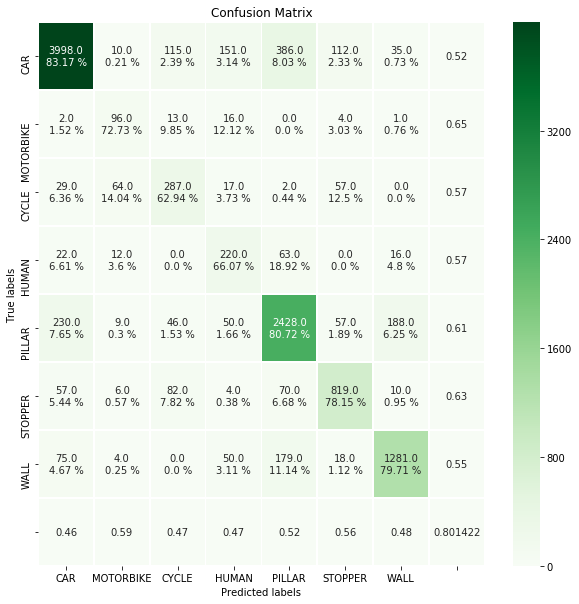

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

normalized_X_train = preprocessing.normalize(X_train)
normalized_X_test = preprocessing.normalize(X_test)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(29,), random_state=5,activation="relu")
clf.fit(normalized_X_train,y_train)
result = clf.predict(normalized_X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(confusion_matrix(result, y_test))
print(accuracy_score(result, y_test))

plot_confusionMatrix(result, y_test)

In [22]:
np.array(X_train).shape

(17086, 90)